## Packages versions

In [1]:
import sys
sys.version

'3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]'

In [2]:
import pandas as pd
pd.__version__

'1.5.1'

In [3]:
import matplotlib
matplotlib.__version__

'3.6.1'

In [4]:
import numpy as np
np.__version__

'1.23.4'

In [5]:
import scipy as sp
sp.__version__

'1.9.3'

In [7]:
import sklearn
sklearn.__version__

'1.2.0'

## Code

In [8]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [10]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [12]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
iris_dataset['data'].shape

(150, 4)

In [18]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
iris_dataset['target'][:5]

array([0, 0, 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [21]:
X_train.shape

(112, 4)

In [22]:
y_train.shape

(112,)

In [23]:
X_test.shape

(38, 4)

In [24]:
y_test.shape

(38,)

In [25]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [27]:
iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


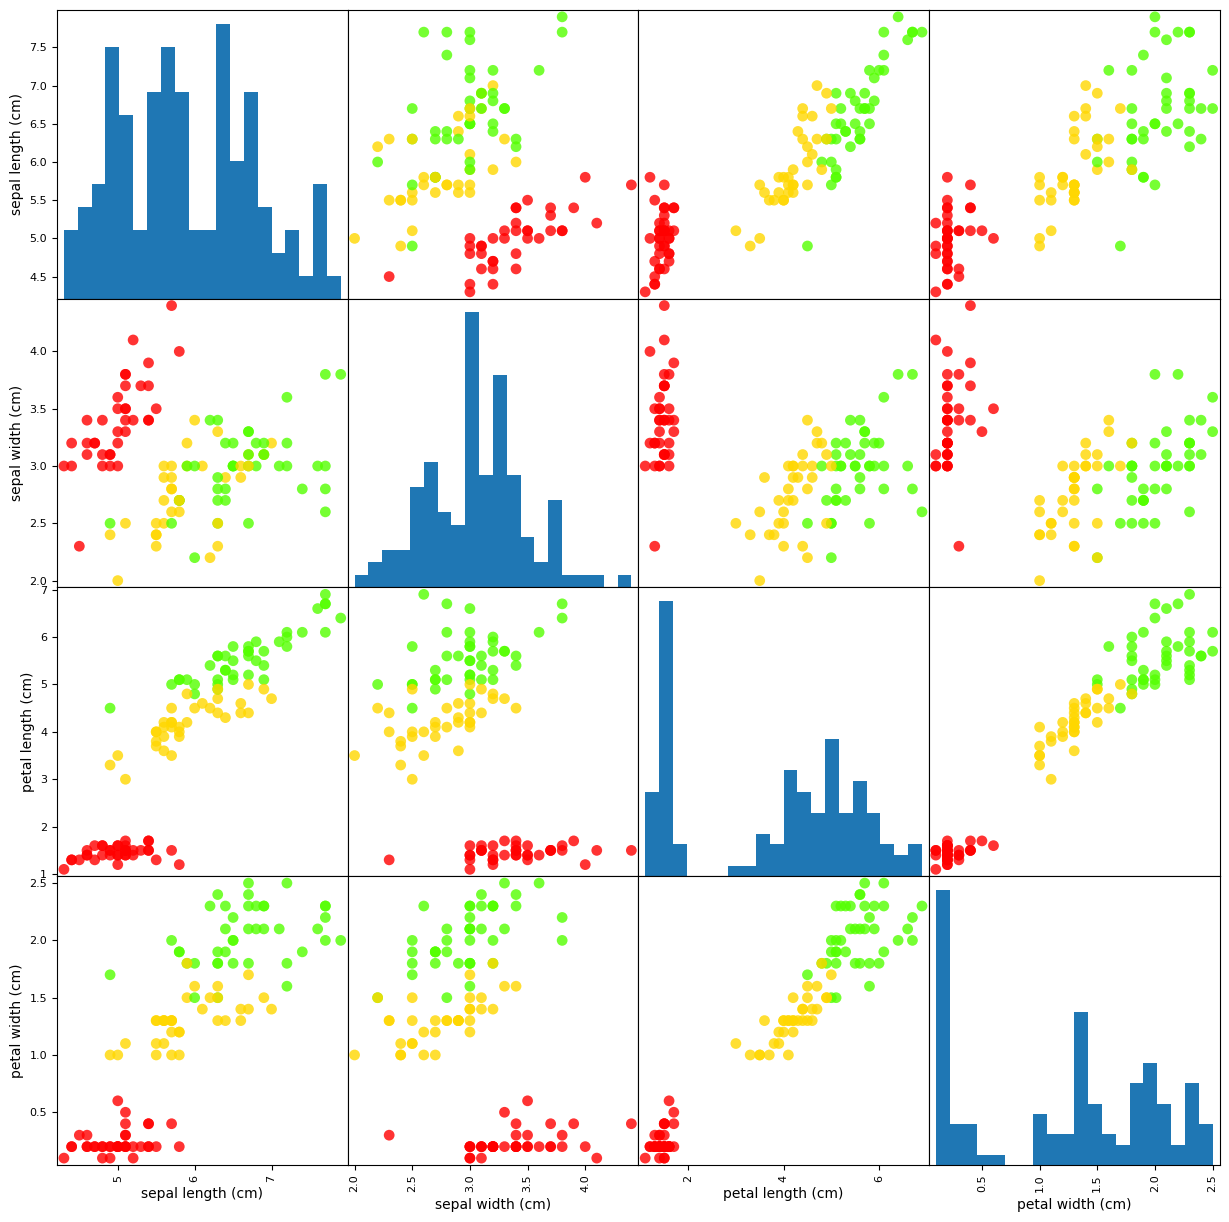

In [39]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize = (15, 15), marker='o', hist_kwds={'bins': 20}, alpha=.8, cmap='prism')

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.score(X_train, y_train)

1.0

In [51]:
knn.score(X_test, y_test)

0.9736842105263158

In [82]:
values_dictionary = {
    'sepal length (cm)': [i[0] for i in X_test[:5]],
    'sepal width (cm)': [i[1] for i in X_test[:5]],
    'petal length (cm)': [i[2] for i in X_test[:5]],
    'petal width (cm)': [i[3] for i in X_test[:5]],
    'predictions': np.array([iris_dataset['target_names'][knn.predict([i])[0]] for i in X_test[:5]])
}

In [83]:
values_dictionary

{'sepal length (cm)': [5.8, 6.0, 5.5, 7.3, 5.0],
 'sepal width (cm)': [2.8, 2.2, 4.2, 2.9, 3.4],
 'petal length (cm)': [5.1, 4.0, 1.4, 6.3, 1.5],
 'petal width (cm)': [2.4, 1.0, 0.2, 1.8, 0.2],
 'predictions': array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
       dtype='<U10')}

In [84]:
pd.DataFrame(values_dictionary)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predictions
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
